In [ ]:
import pandas as pd
encodings = ['utf-8', 'latin1', 'ISO-8859-1']

for enc in encodings:
  try:
    space_missions = pd.read_csv("space_missions.csv")
    data_dict = pd.read_csv("space_missions.csv")
    successful_encoding = enc
    break
  except Exception as e:
    successful_encoding = None
    continue

if successful_encoding:
  overview = {
      "encoding_used" : successful_encoding,
      "rows" : space_missions.shape[0],
      "columns" : space_missions.shape[1],
      "columns_names" : list(space_missions.columns)
  }

  missing_summary = space_missions.isna().sum().reset_index()
  missing_summary.columns = ["Columns", "Missing Values"]
  missing_summary["%Missing"] = (missing_summary['Missing Values'] / len(space_missions)) * 100

  data_types = space_missions.dtypes.reset_index()
  data_types.columns = ["Column", "Data Type"]

  data_quality = pd.merge(data_types, missing_summary, on="Column")
  overview, data_quality.head(15)
else:
  "Failed to read the CSV with common encodings (utf-8, latin1, ISO-8859-1)."
             
for enc in encodings:
    try:
        space_missions = pd.read_csv('space_missions.csv')
        data_dict = pd.read_csv('space_missions.csv')
        successful_encoding = enc
        break
    except Exception as e:
        successful_encoding = None
        continue
    
    if successful_encoding:
        overview = {
            'encoding_used' : successful_encoding,
            'rows' : space_missions.shape[0],
            'columns' : space_missions.shape[1],
            'columns_names': list(space_missions.columns)
        
        }

        missing_summary = space_missions.isna().sum().reset_index()
        missing_summary.columns = ['Columns', 'Missing Values']
        missing_summary['%Missing'] = (missing_summary['Missing Values'] / len(space_missions)) * 100

        data_types = space_missions.dtypes.reset_index()
        data_types.columns = ['Column', 'Data Type']

        data_quality = pd.merge(data_types, missing_summary, on='Column')
        overview, data_quality.head(15)
    else:
        'Failed to read CSV with common encodings (utf-8, latin1, ISO-8859-1).'

In [9]:
space_missions = pd.read_csv('space_missions.csv', encoding='latin1')
list(space_missions.columns)

['Company',
 'Location',
 'Date',
 'Time',
 'Rocket',
 'Mission',
 'RocketStatus',
 'Price',
 'MissionStatus']

In [15]:
space_missions = pd.read_csv('space_missions.csv', encoding='latin1')

space_missions.columns = (
    space_missions.columns.str.strip().str.replace(' ', '_')
)
space_missions['Date'] = pd.to_datetime(space_missions['Date'], errors='coerce')

space_missions['Price'] = (
    space_missions['Price'].astype(str).str.replace(r'[^0-9.]', '', regex=True)
    .replace('', None)
    .astype(float)
)

clean_summary = {
    'date_range': (space_missions['Date'].min(), space_missions['Date'].max()),
    'price_non_null': space_missions['Price'].notna().sum(),
    'price_min': space_missions['Price'].min(),
    'price_max': space_missions['Price'].max(),
    'price_mean': space_missions['Price'].mean(),
}

clean_summary

{'date_range': (Timestamp('1957-03-11 00:00:00'),
  Timestamp('2022-12-07 00:00:00')),
 'price_non_null': 1265,
 'price_min': 2.5,
 'price_max': 5000.0,
 'price_mean': 128.30391304347827}

In [18]:
# Descriptive statistics and unique counts per column
numeric_summary = space_missions.describe().T

unique_counts = space_missions.nunique().reset_index()
unique_counts.columns = ['Column', 'Unique Values']

desc_summary = {
    'numeric_summary': numeric_summary,
    'unique_counts': unique_counts
}

print('Numeric Summary:')
print(numeric_summary)

print('\nUnique Counts per Column:')
print(unique_counts)

Numeric Summary:
        count                           mean                  min  \
Date     1673  1990-07-13 02:06:31.631799168  1957-03-11 00:00:00   
Price  1265.0                     128.303913                  2.5   

                       25%                  50%                  75%  \
Date   1973-04-12 00:00:00  1988-05-09 00:00:00  2007-11-03 00:00:00   
Price                 30.0                63.23                115.0   

                       max         std  
Date   2022-12-07 00:00:00         NaN  
Price               5000.0  256.769663  

Unique Counts per Column:
          Column  Unique Values
0        Company             62
1       Location            158
2           Date           1529
3           Time           1300
4         Rocket            370
5        Mission           4556
6   RocketStatus              2
7          Price             65
8  MissionStatus              4


In [21]:
duplicate_count = space_missions.duplicated().sum()

missing_counts = space_missions.isna().sum().reset_index()
missing_counts.columns = ['Column', 'Missing Values']
missing_counts['%Missing'] = (missing_counts['Missing Values'] / len(space_missions)) * 100

invalid_dates = space_missions['Date'].isna().sum()

invalid_prices = space_missions[space_missions['Price'] <= 0].shape[0]

data_validation = {
    'duplicated_rows' : duplicate_count,
    'invalid_dates' : invalid_dates,
    'invalid_prices' : invalid_prices,
    'missing_summary' : missing_counts.sort_values(by='%Missing', ascending=False)
}

print(missing_counts)


data_validation

          Column  Missing Values   %Missing
0        Company               0   0.000000
1       Location               0   0.000000
2           Date            2957  63.866091
3           Time             127   2.742981
4         Rocket               0   0.000000
5        Mission               0   0.000000
6   RocketStatus               0   0.000000
7          Price            3365  72.678186
8  MissionStatus               0   0.000000


{'duplicated_rows': 9,
 'invalid_dates': 2957,
 'invalid_prices': 0,
 'missing_summary':           Column  Missing Values   %Missing
 7          Price            3365  72.678186
 2           Date            2957  63.866091
 3           Time             127   2.742981
 0        Company               0   0.000000
 1       Location               0   0.000000
 4         Rocket               0   0.000000
 5        Mission               0   0.000000
 6   RocketStatus               0   0.000000
 8  MissionStatus               0   0.000000}

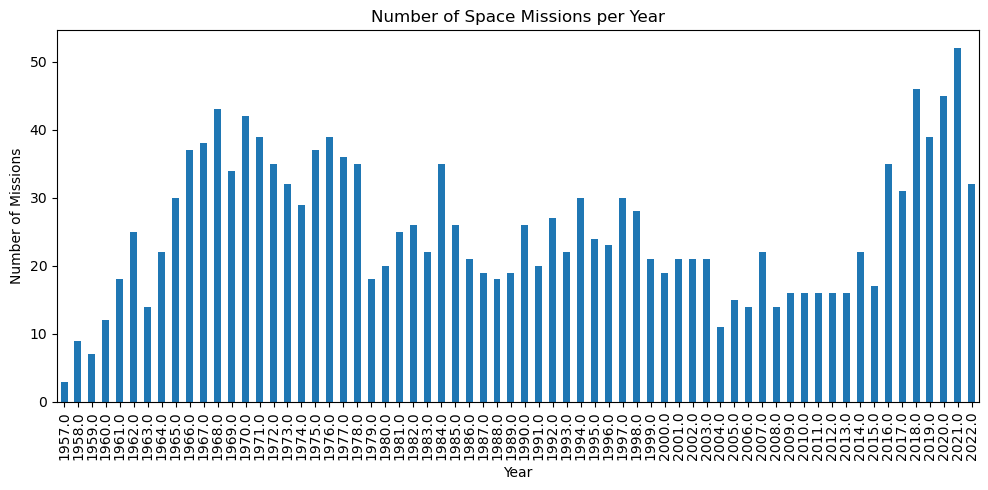

In [22]:
import matplotlib.pyplot as plt

missions_by_year = space_missions.groupby(space_missions['Date'].dt.year).size()

plt.figure(figsize=(10,5))
missions_by_year.plot(kind='bar')
plt.title('Number of Space Missions per Year')
plt.xlabel('Year')
plt.ylabel('Number of Missions')
plt.tight_layout()
plt.show()

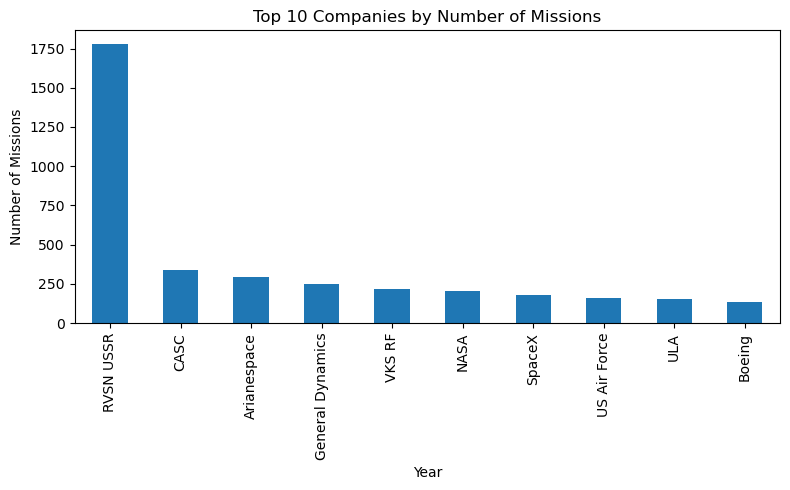

In [23]:
top_companies = space_missions['Company'].value_counts().head(10)

plt.figure(figsize=(8,5))
top_companies.plot(kind='bar')
plt.title('Top 10 Companies by Number of Missions')
plt.xlabel('Year')
plt.ylabel('Number of Missions')
plt.tight_layout()
plt.show()

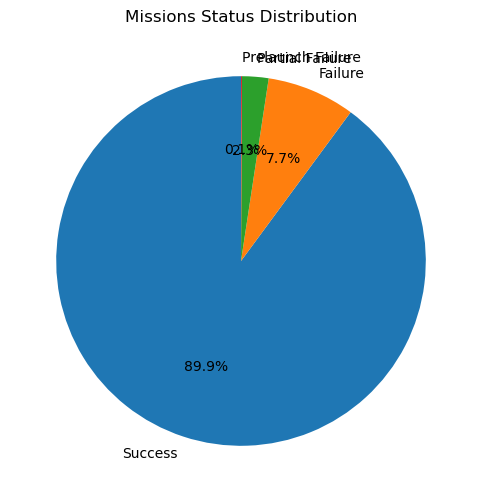

In [25]:
mission_status_counts = space_missions['MissionStatus'].value_counts()

plt.figure(figsize=(6,6))
mission_status_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Missions Status Distribution')
plt.ylabel('')
plt.show()

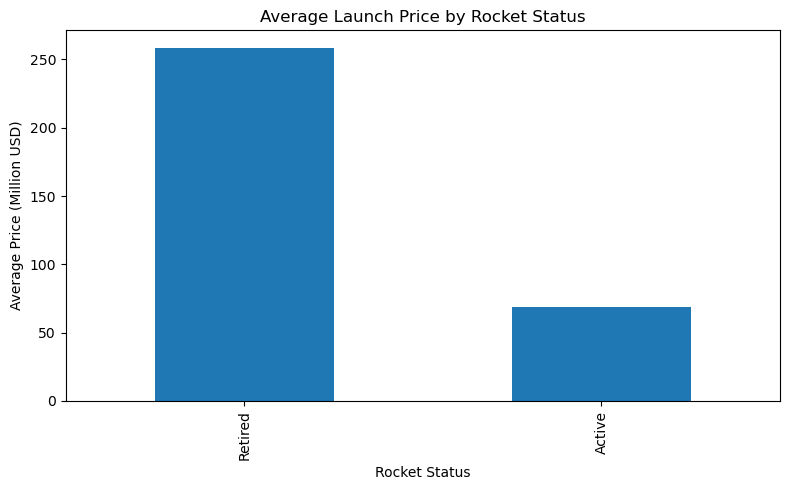

(Date
 1957.0     3
 1958.0     9
 1959.0     7
 1960.0    12
 1961.0    18
 dtype: int64,
 Company
 RVSN USSR           1777
 CASC                 338
 Arianespace          293
 General Dynamics     251
 VKS RF               216
 Name: count, dtype: int64,
 MissionStatus
 Success              4162
 Failure               357
 Partial Failure       107
 Prelaunch Failure       4
 Name: count, dtype: int64,
 RocketStatus
 Retired    258.413970
 Active      68.576344
 Name: Price, dtype: float64)

In [27]:
avg_price_by_rocket_status = (
    space_missions.dropna(subset=['Price'])
    .groupby('RocketStatus')['Price']
    .mean()
    .sort_values(ascending=False)
)
plt.figure(figsize=(8,5))
avg_price_by_rocket_status.plot(kind='bar')
plt.title('Average Launch Price by Rocket Status')
plt.xlabel('Rocket Status')
plt.ylabel('Average Price (Million USD)')
plt.tight_layout()
plt.show()

missions_by_year.head(), top_companies.head(), mission_status_counts, avg_price_by_rocket_status

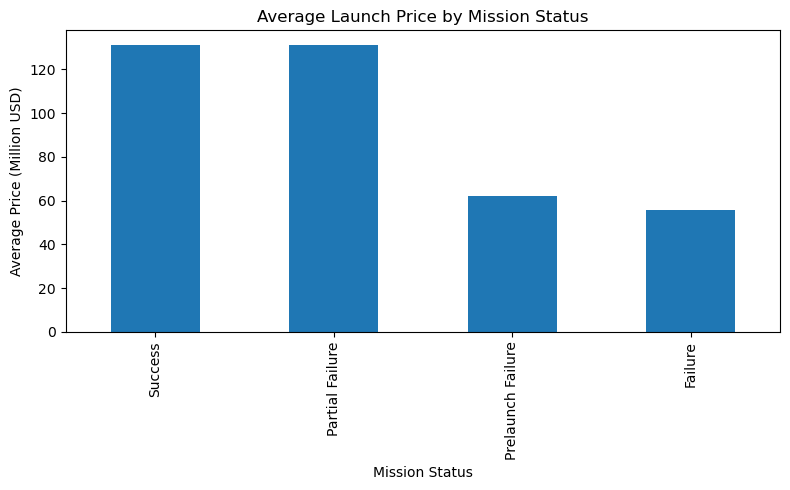

In [28]:
avg_price_by_mission_status = (
    space_missions.dropna(subset=['Price'])
    .groupby('MissionStatus')['Price']
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(8,5))
avg_price_by_mission_status.plot(kind='bar')
plt.title('Average Launch Price by Mission Status')
plt.xlabel('Mission Status')
plt.ylabel('Average Price (Million USD)')
plt.tight_layout()
plt.show()

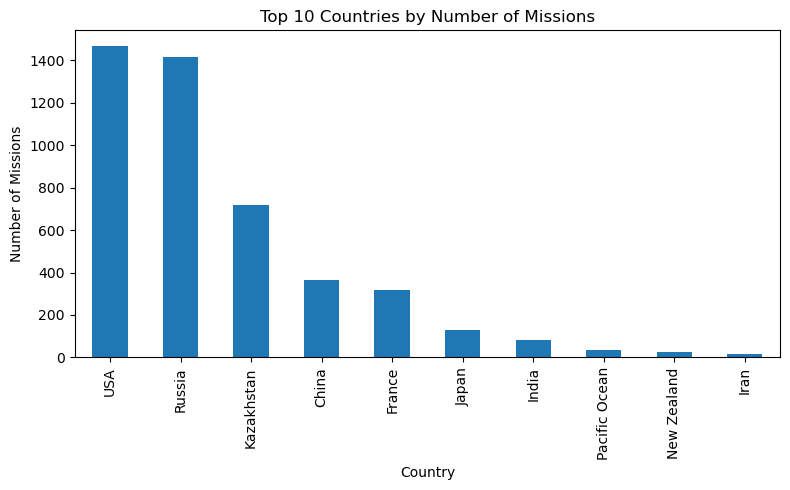

In [29]:
space_missions['Country'] = space_missions['Location'].apply(lambda x: x.split(',')[-1].strip())
missions_by_country = space_missions['Country'].value_counts().head(10)

plt.figure(figsize=(8,5))
missions_by_country.plot(kind='bar')
plt.title('Top 10 Countries by Number of Missions')
plt.xlabel('Country')
plt.ylabel('Number of Missions')
plt.tight_layout()
plt.show()

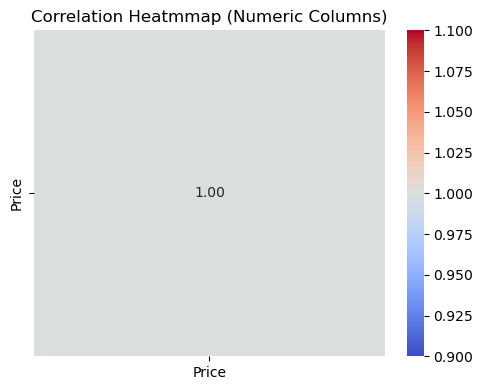

(MissionStatus
 Success              131.232005
 Partial Failure      131.168421
 Prelaunch Failure     62.000000
 Failure               55.532083
 Name: Price, dtype: float64,
 Country
 USA              1467
 Russia           1416
 Kazakhstan        719
 China             365
 France            318
 Japan             130
 India              82
 Pacific Ocean      36
 New Zealand        28
 Iran               16
 Name: count, dtype: int64,
        Price
 Price    1.0)

In [31]:
import seaborn as sns
numeric_cols = space_missions.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(5,4))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmmap (Numeric Columns)')
plt.tight_layout()
plt.show()

avg_price_by_mission_status, missions_by_country.head(10), numeric_cols.corr()